<a href="https://colab.research.google.com/github/jayaemekar/CSCI-611-AppiledMachineLearning/blob/main/JE_Final_Exam_CSCI_611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Jayarani Emekar, CSCI-611 Date- 13 May 2021
# Sources/guidance/assistance received - Python tutorials scipy-lectures, Muller book
# Enviorment Developed and Tested: GOOGLE COLABORATORY (COLAB) 


#Import Libraries

In [224]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# data preprocessing
from sklearn.preprocessing import LabelEncoder

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#Feature Scaling
from sklearn.preprocessing import StandardScaler


# Model evaluation
from sklearn.model_selection import cross_val_score

# Create a classification report and confusion matrix for the model.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# Remove warnings
import warnings
warnings.filterwarnings('ignore')


#SECTION 1 - DATA INTERPRETATION 

##1. DATASET DIMENSIONS & TYPES

Load the Data


In [225]:
#Load the data
titanic = pd.read_csv('/content/titanic_train_exam.csv')

a. How many exemplars are in the dataset?

In [226]:
#How many exemplars are in the dataset?
print ('Exemplars in the dataset are ',len(titanic))

Exemplars in the dataset are  884


b. How many total features?

In [227]:
#How many total features?
print ('Total features in the dataset are ',len(titanic.columns))

Total features in the dataset are  12


c. List the unique data types? 

In [228]:
#List the unique data types? 
print ('Total unique data types the dataset are \n ',titanic.dtypes.unique)

Total unique data types the dataset are 
  <bound method Series.unique of PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object>


##2. EXPLORE NULL VALUES


a. Display the first four exemplars in this dataset. Do you see any null values displayed?

In [229]:
#Display the first four exemplars in this dataset. Do you see any null values displayed?
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,NaN,Q
1,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.75,NaN,Q
2,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.75,NaN,Q
3,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.50,NaN,Q


Yes , we can see null values in below columns:
1. Age 
2. Cabin




b. Visualize the null features using a graph of your choice. Which features stand out?

Age plot for null values

Age Null values 175
Age Not Null values 709


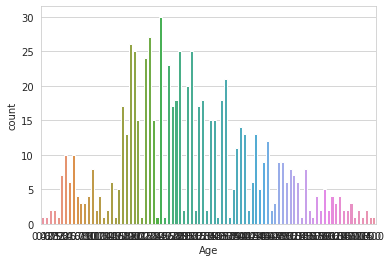

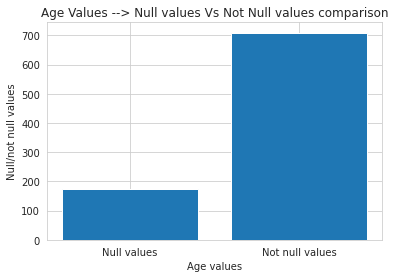

In [230]:
#Plot the Cabin column
print('Age Null values',titanic.Age.isnull().sum())
print('Age Not Null values',titanic.Age.notnull().sum())

# count plot on single categorical variable
sns.countplot(x ='Age', data = titanic)
 
# Show the plot
plt.show()     

left = [1, 2]
  
# heights of bars
height = [titanic.Age.isnull().sum(), titanic.Age.notnull().sum()]
  
# labels for bars
tick_label = ['Null values', 'Not null values']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label)
  
plt.xlabel('Age values')
plt.ylabel('Null/not null values')
plt.title('Age Values --> Null values Vs Not Null values comparison')
  
# function to show the plot
plt.show()

Plot for null values of cabin

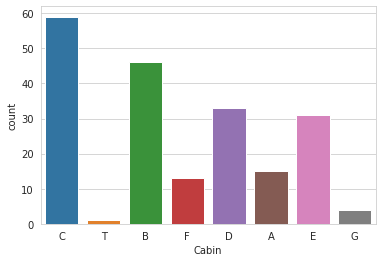

682
202


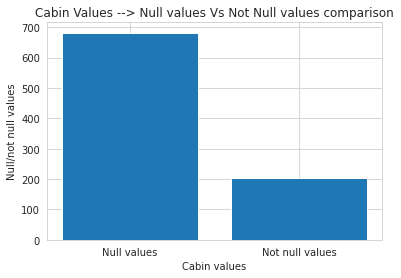

Cabin feature has most number of null values 


In [231]:
#Visualize the null features using a graph of your choice. Which features stand out?

#Plot the Cabin column
titanic["Cabin"]=titanic.Cabin.str[0]
titanic["Cabin"].unique() # 0 is for null values

# count plot on single categorical variable
sns.countplot(x ='Cabin', data = titanic)
 
# Show the plot
plt.show()     

print(titanic['Cabin'].isnull().sum())
print(titanic['Cabin'].notnull().sum())

left = [1, 2]
  
# heights of bars
height = [titanic['Cabin'].isnull().sum(), titanic['Cabin'].notnull().sum()]
  
# labels for bars
tick_label = ['Null values', 'Not null values']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label)
  
plt.xlabel('Cabin values')
plt.ylabel('Null/not null values')
plt.title('Cabin Values --> Null values Vs Not Null values comparison')
  
# function to show the plot
plt.show()

print('Cabin feature has most number of null values ')


Looking at the null values plot of feature Age and Cabin,

Cabin has more null values than age.
Age feature stands out in this case as it has less null values than cabin

For the feature with the greatest number of nulls, how many rows are affected? 

In [232]:
#Below are the missing values 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            175
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          682
Embarked         2
dtype: int64

In [233]:
print('Cabin feature is having highest number of null values = 682')


Cabin feature is having highest number of null values = 682


Which Passenger Class has the greatest number of null valued cabins?

        PassengerId  Survived  Name  Sex  ...  Ticket  Fare  Cabin  Embarked
Pclass                                    ...                               
1                40        40    40   40  ...      40    40      0        40
2               166       166   166  166  ...     166   166      0       166
3               476       476   476  476  ...     476   476      0       476

[3 rows x 11 columns]

 Passenger class with greatest number of null values cabins --> 3 (class 3)



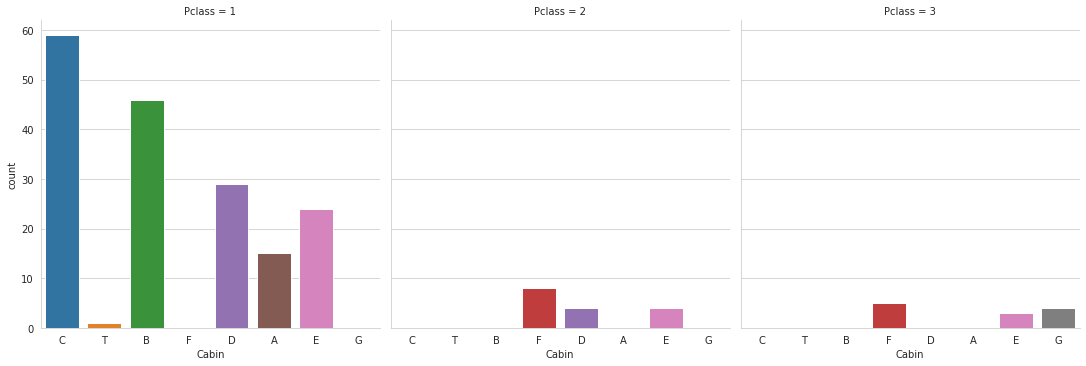

In [234]:
print(titanic[titanic['Cabin'].isnull()].groupby('Pclass').count())
print("\n Passenger class with greatest number of null values cabins --> 3 (class 3)\n")
sns.factorplot('Cabin', col = 'Pclass', data = titanic, kind = 'count')

##TARGET CLASS - Survived

a. How many Survivors are in the dataset? Non-survivors? 


In [235]:
print('Survivors in the dataset ', len(titanic[titanic['Survived'] ==1]))
print('Non survivors in the dataset ', len(titanic[titanic['Survived'] == 0]))


Survivors in the dataset  339
Non survivors in the dataset  545


b. Compare the number of survivors to non-survivors in a labeled graph. 

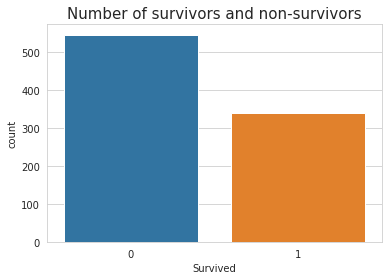

In [236]:
# count plot on single categorical variable
sns.countplot(x ='Survived', data = titanic)
# Show the plot
plt.title('Number of survivors and non-survivors',fontsize=15)
plt.show()

c. Expand the graph to include survivor information by gender

Text(0.5, 1.0, 'Survival Probability by Gender')

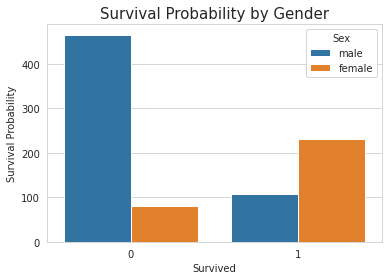

In [237]:
# Survival by gender 
sns.countplot(x ='Survived',hue = 'Sex', data = titanic)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender',fontsize=15)

d. Expand the graph to include survivor information by Passenger class.

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

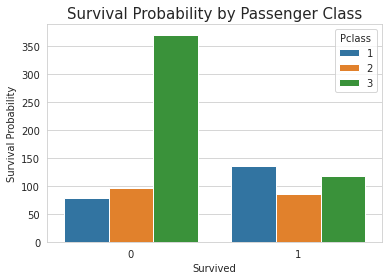

In [238]:
# Survival by Pclass 
sns.countplot(x ='Survived',hue = 'Pclass', data = titanic)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class',fontsize=15)

e Do these graphs provide a general picture of survival by gender or Pclass, if so, what?

Text(0.5, 1.0, 'Survival Probability by Gender and Passenger Class')

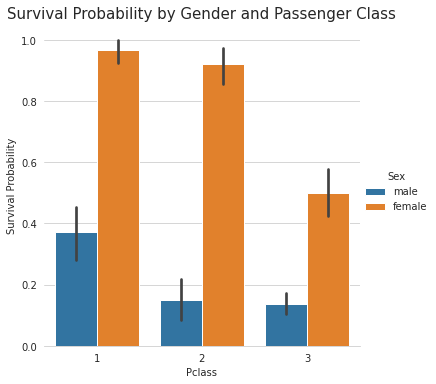

In [239]:
# Survival by gender and passenger class
graph = sns.factorplot(x = 'Pclass', y = 'Survived',kind = 'bar',hue = 'Sex', data = titanic)
graph.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender and Passenger Class',fontsize=15)

**Do these graphs provide a general picture of survival by gender or Pclass, if so, what?**





Yes. these graphs provide a general picture of survival by gender or Pclass

1. Pclass is contributing to a persons chance of survival, especially if this person is in class 1
2. Gender survival rate for female is more.

Combine both of these things survival rate for females in the first class is highest

## DISTRIBUTIONS

a. Create a visual to graph the Age distribution.

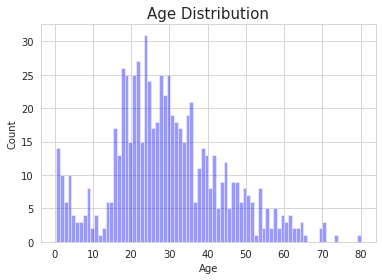

In [240]:
#Create a visual to graph the Age distribution.
sns.set_style("whitegrid")
sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="blue")
plt.title("Age Distribution",fontsize=15)
plt.ylabel("Count");


b. What is the min?  max?  mean?  and mode age?

In [241]:
# using groupby function with aggregation
# to get mean, min and max values
result = titanic.agg({'Age': ['mean', 'min', 'max']}) 
print("Mean, min, and max values of Age")
print(result)
print('Mode Value : ',titanic.Age.mode())

Mean, min, and max values of Age
            Age
mean  29.627884
min    0.420000
max   80.000000


Below are the values of Mean, min, and max values of Age

1. Mean  29.627884
2. min    0.420000
3. max   80.000000

c. Use a labeled graph of your choice to show the distribution of Fares.

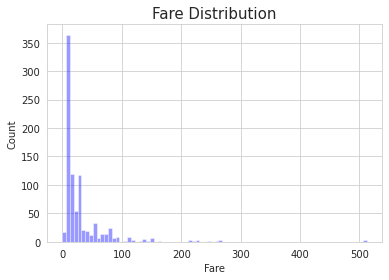

In [242]:
#Use a labeled graph of your choice to show the distribution of Fares.
#Create a visual to graph the Fare distribution.
sns.set_style("whitegrid")
sns.distplot(titanic["Fare"].dropna(),
                 bins=80,
                 kde=False,
                 color="blue")
plt.title("Fare Distribution",fontsize=15)
plt.ylabel("Count");

d. Describe the full range of statistics for Fares.

In [243]:
# using groupby function with aggregation
# to get mean, min and max values
result = titanic.agg({'Fare': ['mean', 'min', 'max']}) 
print("Mean, min, and max values of Fare")
print(result)
print('Mode Value : ',titanic.Fare.mode())

Mean, min, and max values of Fare
            Fare
mean   32.057013
min     0.000000
max   512.329200


Mean, min, and max values of Fare

1. mean   32.057013
2. min     0.000000
3. max   512.329200

Both of the continuous features (Age and Fare) have good split points and spikes.

1. Distribution of Age feature clearly shows that children younger than 15 has a higher survival rate than any of the other age groups
2. In distribution of Fare feature, the survival rate is higher on distribution tails. The distribution also has positive skew because of the extremely large outliers

No handles with labels found to put in legend.
No handles with labels found to put in legend.


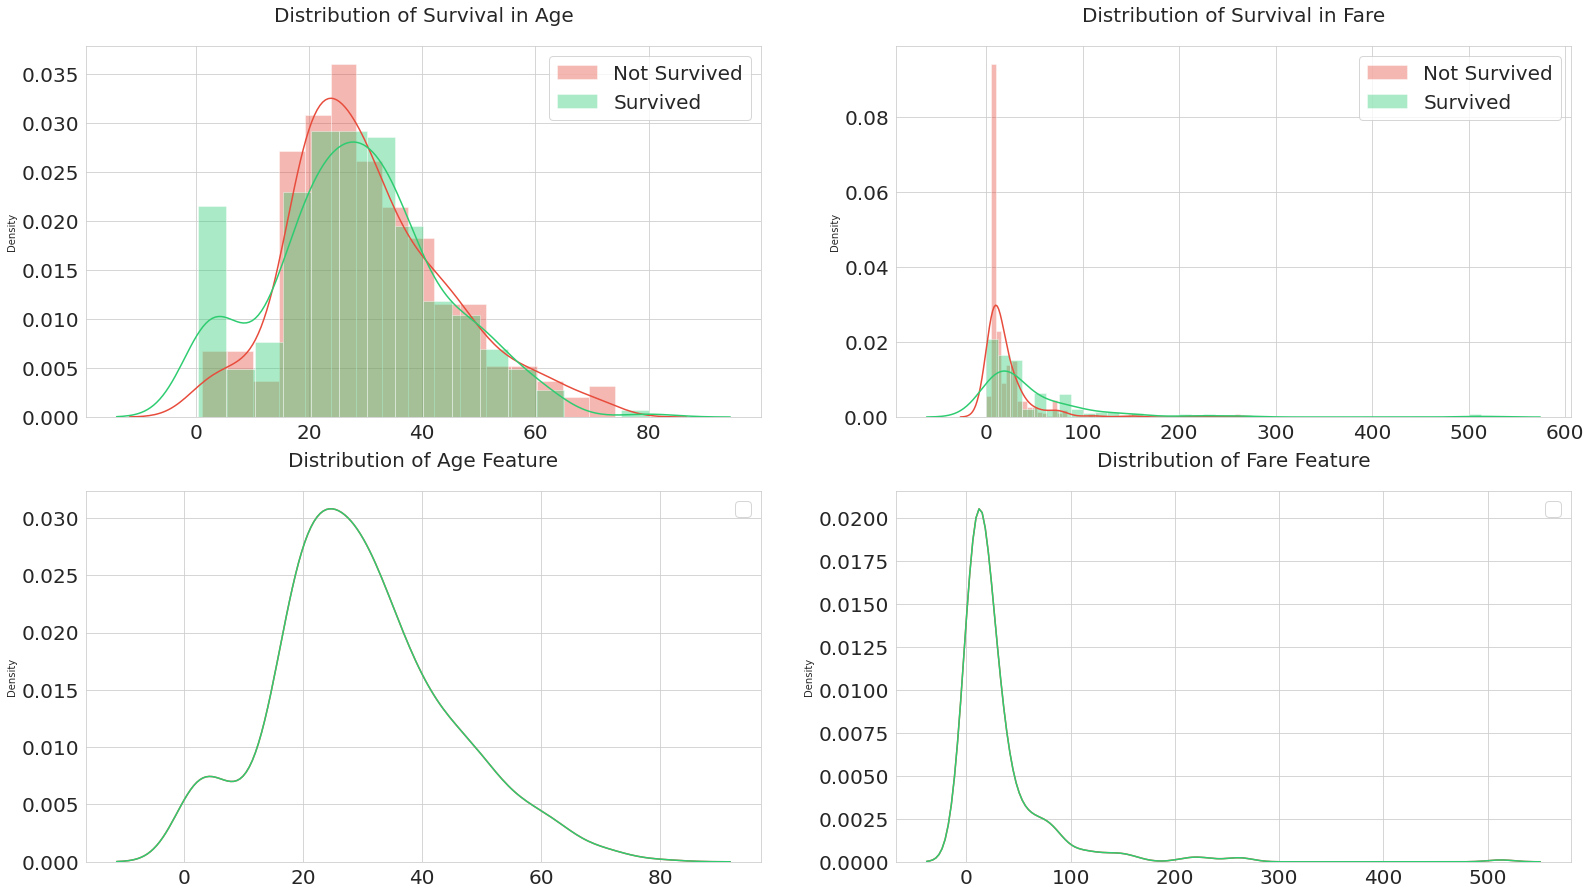

In [244]:

cont_features = ['Age', 'Fare']
surv = titanic['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(titanic[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(titanic[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
      # Distribution of feature in dataset
    sns.distplot(titanic[feature], hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(titanic[feature], hist=False, color='#2ecc71', ax=axs[1][i])
    

    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

#SECTION 2 – PREPROCESSING the DATA

##NULL VALUES


a. For any feature with > 50% null values, drop the feature from the dataset. What, if any,
feature(s) did you drop? 


In [245]:
#For any feature with > 50% null values, drop the feature from the dataset. 
#Percentage missing values from titanic data for each table
total = titanic.isnull().sum().sort_values(ascending=False)
percent = titanic.isnull().sum()/titanic.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,682,77.149321
Age,175,19.796380
Embarked,2,0.226244
Fare,0,0.000000
Ticket,0,0.000000


Yes 'Cabin' column has more than 50% Null values. I am planning to drop this feature

From above data we can analyze that

The Embarked feature has only 2 missing values, which can easily be filled.
1. 'Age' feature, which has 175 missing values.It will be much more tricky, to deal with the Age feature.
2. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

Also, Looking at the titanic data The features contribute to a high survival rate are everything except ‘PassengerId’, ‘Ticket’ and ‘Name’.

**b. For any feature with < 10% null values, remove the associated exemplars from the dataset.
How many, if any, rows did you remove?**

<br> Yes. For 'Embarked' column has less  2 null values. (0.22%) removing these two rows doesnt impact much on our prediction hence i will remove these two rows.



c. Use a seaborn boxplot (or other labeled graph of choice) to visualize the Age distribution per
Passenger class. What do you observe about the Age/Pclass relationship? 

In [246]:
# Survival by gender and passenger class
for x in [titanic]:
    x['Age_bin']=np.nan
    for i in range(8,0,-1):
        x.loc[ x['Age'] <= i*10, 'Age_bin'] = i
titanic[["Age" , "Age_bin"]].head(10)

,Age,Age_bin
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,16.0,2.0
6,40.5,5.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


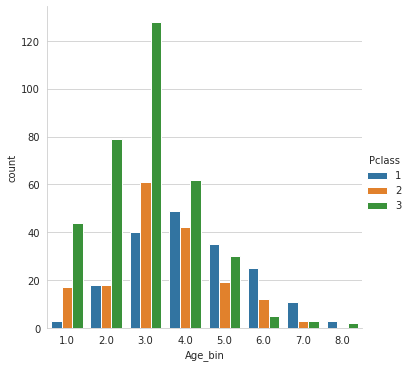

In [247]:
sns.factorplot('Age_bin',data=titanic,hue='Pclass',kind='count')

Age PClass Relationship

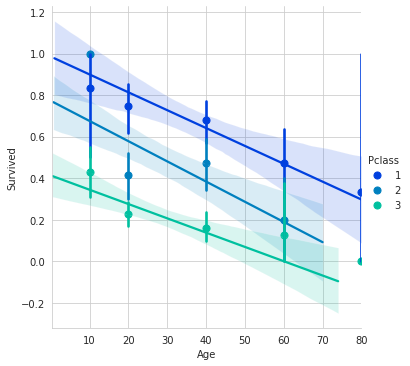

In [248]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic,palette='winter', x_bins=generations)


From above graph, Surrivival rate is higher when person is from class 1 and age is around 30

d. Apply imputation (based on Passenger class mean) to fill empty age values. Show your code.
Verify results. What is the mean age per class? 

In [249]:
# using groupby function with aggregation
# to get mean, min and max values
result = titanic.groupby('Pclass').agg({'Age': ['mean', 'min', 'max']})
print("Mean, min, and max values of Survived grouped by Pclass")
print(result)
print ("Mode value : ",titanic.Age.mode())

Mean, min, and max values of Survived grouped by Pclass
              Age            
             mean   min   max
Pclass                       
1       38.105543  0.92  80.0
2       29.842035  0.67  70.0
3       25.104589  0.42  74.0
Mode value :  0    24.0
dtype: float64


Filling Null values for age

In [250]:
# replacing na values in college with No college
titanic.Age = np.where(titanic.Pclass==1, titanic["Age"].fillna(float(38.105543)), titanic.Age)
titanic.Age = np.where(titanic.Pclass==2, titanic["Age"].fillna(float(29.842035)), titanic.Age)
titanic.Age = np.where(titanic.Pclass==3, titanic["Age"].fillna(float(25.104589)), titanic.Age)
  

In [251]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          682
Embarked         2
Age_bin        175
dtype: int64

##6. CATEGORICAL DATA


**a. We will want to keep the categorical features that can be reasonably encoded and have intrinsic
value. Which categorical feature have you already observed to be highly correlated with
Survival?  Encode that one.**

From above data we can analyze that

The Embarked feature has only 2 missing values, which can easily be filled.

1. 'Age' feature, which has 175 missing values.which is filled using the mean value of Pclass.
2. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing. and that doesnt count for surrival prediction so decided to drop the column

Also, Looking at the titanic data The features contribute to a high survival rate are everything except ‘PassengerId’, ‘Ticket’ and ‘Name’.

Lets drop the column which are not contributing to high surrival rate

In [252]:
# Drop the columns
titanic = titanic.drop([ 'Name', 'Ticket', 'Cabin','PassengerId','Age_bin'], axis=1)


**b. In fact, encode any remaining categorical features that have a value-set of size < 5. Which?**

'Embarked' feature has less than 5 values, so those rows can be dropped

In [253]:
#Remove the rows with missing values
titanic = titanic.dropna(subset =['Embarked'])
titanic_after_drop =titanic

In [254]:
#Count the NEW number of rows and columns in the data set
titanic.shape

(882, 8)

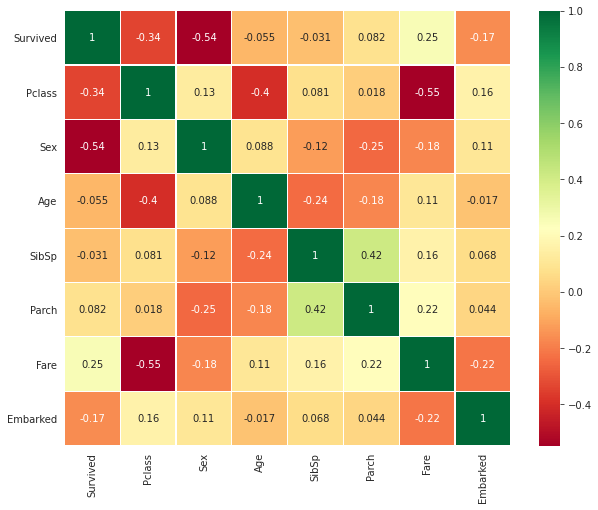

In [286]:
sns.heatmap(titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Encoding categorical data values (Transforming object data types to integers)

In [256]:
#Print the NEW unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['Q' 'S' 'C']


Label Encoding 
Encoding categorical data values (Transforming object data types to integers)

In [257]:
#Encoding categorical data values (Transforming object data types to integers)
labelencoder = LabelEncoder()

titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values) #Encode sex column
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values) #Encode embarked

#Print the NEW unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[1 2 0]


**c. Remove any remaining unwanted categorical features (we will do no further feature
engineering). Also remove the Passenger ID. Display the top 4 exemplars. How many features
are remaining?**

Removed unwanted features , now 8 features are remaining

In [287]:
titanic.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,25.104589,2,0,23.25,1
1,1,3,1,25.104589,0,0,7.75,1
2,0,3,1,25.104589,1,0,7.75,1
3,1,3,0,25.104589,1,0,15.50,1


#SECTION 3 – MODELING 

##TRAIN-TEST SPLIT

In [258]:
#TRAIN-TEST SPLIT

#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 6, shuffle=True)

print("Size of X_train data ",X_train.shape)
print("Size of Y_train data ",Y_train.shape)
print("Size of X_test data ",X_test.shape)
print("Size of Y_test data ",Y_test.shape)

Size of X_train data  (705, 7)
Size of Y_train data  (705,)
Size of X_test data  (177, 7)
Size of Y_test data  (177,)


##LOGISTIC REGRESSION

Create a LOGISTIC REGRESSION classifier, (you may need to modify max_iter). What is
your training score? test score? 


Modified max tire parameter from defalut value 100 to 150

In [259]:
#Using Logistic Regression Algorithm to the Training Set
log = LogisticRegression(random_state = 24, max_iter=150)
log.fit(X_train, Y_train)
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
print('Logistic Regression Testing Accuracy:', log.score(X_test, Y_test))

Logistic Regression Training Accuracy: 0.8156028368794326
Logistic Regression Testing Accuracy: 0.7457627118644068


Evaluate the results of this model using classification_report. 
<br>What additional insight can you
glean from the report about the two classes? 

In [260]:
# Predictions and Evaluations
# Now predict values for the testing data.
predictions = log.predict(X_test)
# Create a classification report and confusion matrix for the model.
print ('Classification Report : \n',classification_report(Y_test,predictions))

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       106
           1       0.67      0.73      0.70        71

    accuracy                           0.75       177
   macro avg       0.74      0.74      0.74       177
weighted avg       0.75      0.75      0.75       177



A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. 

More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score – What percent of positive predictions were correct
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [261]:
# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, log.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, log.predict(X_test)).ravel()
print('Logistic Regression Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))


Confusion Matrix :
 [[80 26]
 [19 52]]
Logistic Regression Testing Accuracy =  0.7457627118644068


Evaluate the results of this model using confusion_matrix. 
1. How many True-Negatives (NonSurvivors) did your model correctly identify?  
--> There are 52 NonSurvivors model correctly identified
2. How many actual Non-Survivors were
there? 
--> Actual there are 78 Non-Survivors were
there

That ratio represents what metric from the classification_report?

--> The ratio represents precision for 1

In [262]:
# Predictions and Evaluations
# Now predict values for the testing data.
predictions = log.predict(X_test)

# Create a classification report and confusion matrix for the model.
print ('Classification Report : \n',classification_report(Y_test,predictions))


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       106
           1       0.67      0.73      0.70        71

    accuracy                           0.75       177
   macro avg       0.74      0.74      0.74       177
weighted avg       0.75      0.75      0.75       177



In [263]:
print ('Confusion Matrix : \n',confusion_matrix(Y_test,predictions))

Confusion Matrix : 
 [[80 26]
 [19 52]]


##MULTI-LAYER PERCEPTRON


Create a MULTI-LAYER PERCEPTRON (Neural Network), (you may need to modify
max_iter). What is your training score? test score?  

In [264]:
#Create a MULTI-LAYER PERCEPTRON (Neural Network),
mlp_classifier = MLPClassifier(random_state=1,shuffle=True,max_iter=100)

mlp_classifier.fit(X_train, Y_train)
print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_train, Y_train))
print('MLP Classifier Testing Accuracy:', mlp_classifier.score(X_test, Y_test))


MLP Classifier Training Accuracy: 0.8141843971631205
MLP Classifier Testing Accuracy: 0.7627118644067796


Now change the hidden_layer_sizes from the default to [30,30], and refit & score. What are the
new scores on training? testing? 


In [265]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(30,30,),random_state=1,shuffle=True,max_iter=200)

mlp_classifier.fit(X_train, Y_train)

print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_train, Y_train))
print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_test, Y_test))
print('MLP Classifier hidden_layer_sizes layers:', mlp_classifier.hidden_layer_sizes)
print('MLP Classifier N layers:', mlp_classifier.n_layers_)

MLP Classifier Training Accuracy: 0.8198581560283688
MLP Classifier Training Accuracy: 0.768361581920904
MLP Classifier hidden_layer_sizes layers: (30, 30)
MLP Classifier N layers: 4


How many layers are in your model for b?  Was there improvement?
1. MLP Classifier hidden_layer_sizes layers: (30, 30)
2. MLP Classifier N layers: 4
3. There is no improvement in score, either way score is declined from 83.13 to 81.98

In [266]:
# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, mlp_classifier.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, mlp_classifier.predict(X_test)).ravel()
print('MLP Classifier Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Confusion Matrix :
 [[80 26]
 [15 56]]
MLP Classifier Testing Accuracy =  0.768361581920904


#SECTION 4 - MODEL SELECTION


MLP MODEL SEARCH & SELECTION – try a variety of methods from below, to improve upon
your MLP model, creating a model that generalizes well and takes advantage of the entire dataset for
model selection. COMMENT your CODE


##Scaling

In [267]:
#Feature Scaling
sc = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_train = sc.fit_transform(X_train)
# same result, but more efficient computation
X_test = sc.transform(X_test)

In [268]:
mlp_classifier = MLPClassifier(random_state=1,shuffle=True)

mlp_classifier.fit(X_train, Y_train)
print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_train, Y_train))
print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_test, Y_test))

MLP Classifier Training Accuracy: 0.8453900709219858
MLP Classifier Training Accuracy: 0.8022598870056498


Accuricy of Model is increased after sandered Feature Scaling

##Cross validation

Cross-Validation in scikit-learn

In [269]:
mlp_classifier = MLPClassifier(random_state=1,shuffle=True)
scores = cross_val_score(mlp_classifier, X, Y)
print("Cross-Validation in scikit-learn")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))


Cross-Validation in scikit-learn
76.76 accuracy with a standard deviation of 3.02


In [270]:
res = cross_validate(mlp_classifier, X, Y, cv=5,
                     return_train_score=True)
display(res)


{'fit_time': array([0.78198266, 0.75536823, 0.76579261, 0.75539923, 0.79669452]),
 'score_time': array([0.00084352, 0.00080824, 0.00412273, 0.00086331, 0.00079679]),
 'test_score': array([0.76836158, 0.78531073, 0.80681818, 0.76136364, 0.71590909]),
 'train_score': array([0.84397163, 0.82269504, 0.82719547, 0.83711048, 0.82436261])}

In [271]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.781983,0.000844,0.768362,0.843972
1,0.755368,0.000808,0.785311,0.822695
2,0.765793,0.004123,0.806818,0.827195
3,0.755399,0.000863,0.761364,0.837110
4,0.796695,0.000797,0.715909,0.824363


Mean times and scores:
 fit_time       0.771047
score_time     0.001487
test_score     0.767553
train_score    0.831067
dtype: float64


Stratified K-Fold cross-validation and other strategies

In [272]:
kfold = KFold(n_splits=5)
mlp_classifier = MLPClassifier(random_state=1,shuffle=True)
scores = cross_val_score(mlp_classifier, X, Y, cv=kfold)

print("Cross-Validation with n_splits= 5")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

Cross-Validation with n_splits= 5
77.44 accuracy with a standard deviation of 5.63


In [273]:
kfold = KFold(n_splits=3)
mlp_classifier = MLPClassifier(random_state=1,shuffle=True)
scores = cross_val_score(mlp_classifier, X, Y, cv=kfold)

print("Cross-Validation with n_splits= 3")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

Cross-Validation with n_splits= 3
79.82 accuracy with a standard deviation of 1.95


In [274]:
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
mlp_classifier = MLPClassifier(random_state=1,shuffle=True)
scores = cross_val_score(mlp_classifier, X, Y, cv=kfold)

print("Cross-Validation with n_splits= 3")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

Cross-Validation with n_splits= 3
80.27 accuracy with a standard deviation of 1.27


Leave-one-out cross-validation

In [275]:
loo = LeaveOneOut()
mlp_classifier = MLPClassifier(random_state=1,shuffle=True)
scores = cross_val_score(mlp_classifier, X, Y, cv=loo)
print("Cross-Validation with LeaveOneOut")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))


Cross-Validation with LeaveOneOut
80.61 accuracy with a standard deviation of 39.53


Shuffle-split cross-validation

In [276]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
mlp_classifier = MLPClassifier(random_state=1,shuffle=True)
scores = cross_val_score(mlp_classifier, X, Y, cv=shuffle_split)
print("Cross-Validation with ShuffleSplit")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

Cross-Validation with ShuffleSplit
79.25 accuracy with a standard deviation of 1.56


Cross-validation with groups

In [277]:
# create synthetic dataset
X_groupKfold, y_groupKfold = make_blobs(n_samples=12, random_state=0)
mlp_classifier = MLPClassifier(random_state=1,shuffle=True)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(mlp_classifier, X_groupKfold, y_groupKfold, 
                         groups=groups, cv=GroupKFold(n_splits=3))

print("Cross-Validation with ShuffleSplit")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

Cross-Validation with ShuffleSplit
60.56 accuracy with a standard deviation of 14.93


##Grid Search


Simple Grid Search

In [278]:
parameter_space = {
    'hidden_layer_sizes': [(100,75,50), (50,100,50), (150,100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter' : [100,300,50]
}
mlp = MLPClassifier()
grid_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
grid_mlp.fit(X_train, Y_train)
print(f'Best params: {grid_mlp.best_params_}')
print(f'Best score: {grid_mlp.best_score_}')


Best params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'adam'}
Best score: 0.825531914893617


In [279]:
mlp_classifier = MLPClassifier(random_state=1,shuffle=True,activation='tanh', alpha= 0.0001, 
                               hidden_layer_sizes = (50, 100, 50), 
                               learning_rate='adaptive', max_iter= 100,
                               solver = 'adam')

mlp_classifier.fit(X_train, Y_train)
mlp_classifier.fit(X_test, Y_test)
print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_train, Y_train))
print('MLP Classifier Testing Accuracy:', mlp_classifier.score(X_test, Y_test))

MLP Classifier Training Accuracy: 0.8241134751773049
MLP Classifier Testing Accuracy: 0.8531073446327684


Grid Search with Cross-Validation

In [280]:
best_score = 0
for max_iter in [ 1, 200, 100]:
    for hidden_layer_sizes in [(100,75,50), (50,100,50), (150,100,50)]:
        # for each combination of parameters,
        # train an MLPClassifier
        mpl_classifier = MLPClassifier(max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes)
        # perform cross-validation
        scores = cross_val_score(mpl_classifier, X_train, Y_train, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'max_iter': max_iter, 'hidden_layer_sizes': hidden_layer_sizes}
# rebuild a model on the combined training and validation set
mpl_classifier = MLPClassifier(**best_parameters)
mpl_classifier.fit(X_train, Y_train)
print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_train, Y_train))
print('MLP Classifier Testing Accuracy:', mlp_classifier.score(X_test, Y_test))

MLP Classifier Training Accuracy: 0.8241134751773049
MLP Classifier Testing Accuracy: 0.8531073446327684


##Common Hyperparameter Options


In [281]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                               alpha=0.0001, batch_size='auto', learning_rate='constant',
                               learning_rate_init=0.001, power_t=0.5, max_iter=200, 
                               shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                               warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlp_classifier.fit(X_train, Y_train)


print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_train, Y_train))
print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_test, Y_test))

MLP Classifier Training Accuracy: 0.8453900709219858
MLP Classifier Training Accuracy: 0.7909604519774012


##Further Feature Engineering or alternative encoding

**Label Encoding**

It is used to transform non-numerical labels to numerical labels (or nominal categorical variables). Numerical labels are always between 0 and n_classes-1. 

which is already done for class Sex and Embarked

**Correlation between features**
Non-graphical method : This correlation matrix is to understand the strength between variables. Correlation varies between -1 and +1.

-1: Perfect negative linear correlation

+1: Perfect positive linear correlation

0: No correlation

Generally, if the correlation between the two independent variables are high (>= 0.8) then we drop one independent variable otherwise it may lead to multi collinearity problem as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

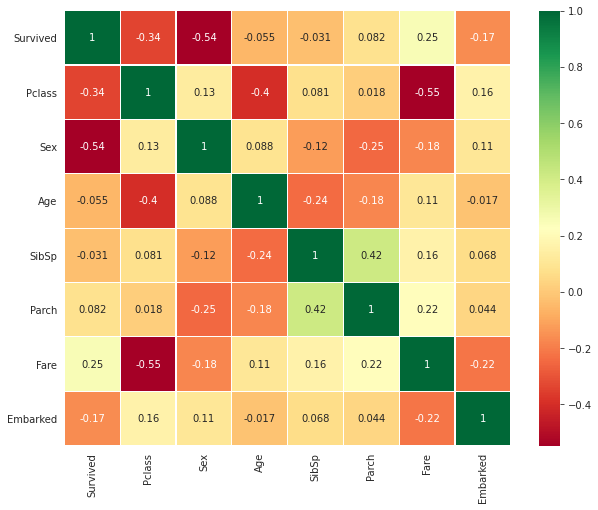

In [282]:
sns.heatmap(titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

One Hot Encoding

In [283]:
#One Hot Encoding for all categorical variables"
train = pd.get_dummies(columns=["Pclass", "Embarked", "Sex"], data=titanic_after_drop, drop_first=True)
display(train.head())

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Sex_1
0,1,25.104589,2,0,23.25,0,1,1,0,1
1,1,25.104589,0,0,7.75,0,1,1,0,1
2,0,25.104589,1,0,7.75,0,1,1,0,1
3,1,25.104589,1,0,15.50,0,1,1,0,0
4,1,25.104589,1,0,15.50,0,1,1,0,0


In [284]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 883
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    882 non-null    int64  
 1   Age         882 non-null    float64
 2   SibSp       882 non-null    int64  
 3   Parch       882 non-null    int64  
 4   Fare        882 non-null    float64
 5   Pclass_2    882 non-null    uint8  
 6   Pclass_3    882 non-null    uint8  
 7   Embarked_1  882 non-null    uint8  
 8   Embarked_2  882 non-null    uint8  
 9   Sex_1       882 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 45.7 KB
None


In [285]:
#Split the data into independent 'X' and dependent 'Y' variables
X = train.iloc[:, 1:8].values 
Y = train.iloc[:, 0].values 

# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 6, shuffle=True)

parameter_space = {
    'hidden_layer_sizes': [(100,75,50), (50,100,50), (150,100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter' : [100,300,50]
}
mlp = MLPClassifier()
grid_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
grid_mlp.fit(X_train, Y_train)
print(f'Best params: {grid_mlp.best_params_}')
print(f'Best score: {grid_mlp.best_score_}')

Best params: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'sgd'}
Best score: 0.7148936170212766


#Final Model Selection Using all Techniques

In [297]:
#Final Model Selection

#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 6, shuffle=True)
#Feature Scaling
sc = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_train = sc.fit_transform(X_train)
# same result, but more efficient computation
X_test = sc.transform(X_test)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,50,25), activation='relu', solver='adam',
                               alpha=0.0001, batch_size='auto', learning_rate='constant',
                               learning_rate_init=0.001, power_t=0.5, max_iter=500, 
                               shuffle=True, random_state=24, tol=0.0001, verbose=False, 
                               warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                               early_stopping=False, validation_fraction=0.05, beta_1=0.9, 
                               beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlp_classifier.fit(X_train, Y_train)


print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_train, Y_train))
print('MLP Classifier Testing Accuracy:', mlp_classifier.score(X_test, Y_test))

MLP Classifier Training Accuracy: 0.9120567375886525
MLP Classifier Testing Accuracy: 0.7740112994350282


I tried a variety of methods from above, to improve upon
your MLP model, created the a model that generalizes well and takes advantage of the entire dataset for
model selection. 

Using this I am able to achieve the accuracy of  'Accuracy: 0.912' which is increased from intial accuracy of 'Accuracy: 0.814'